In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("BostonHousing.csv")


In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

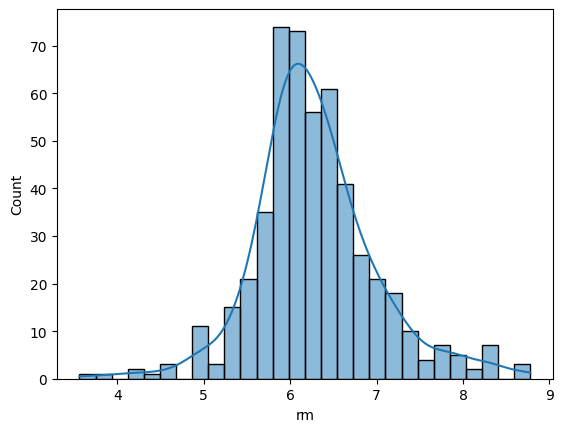

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['rm'], kde=True)
plt.show()


In [6]:
df['rm'].fillna(df['rm'].mean(), inplace=True)


C:\Users\Bhuman Wadekar\AppData\Local\Temp\ipykernel_8968\1273402923.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rm'].fillna(df['rm'].mean(), inplace=True)


In [7]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<Axes: >

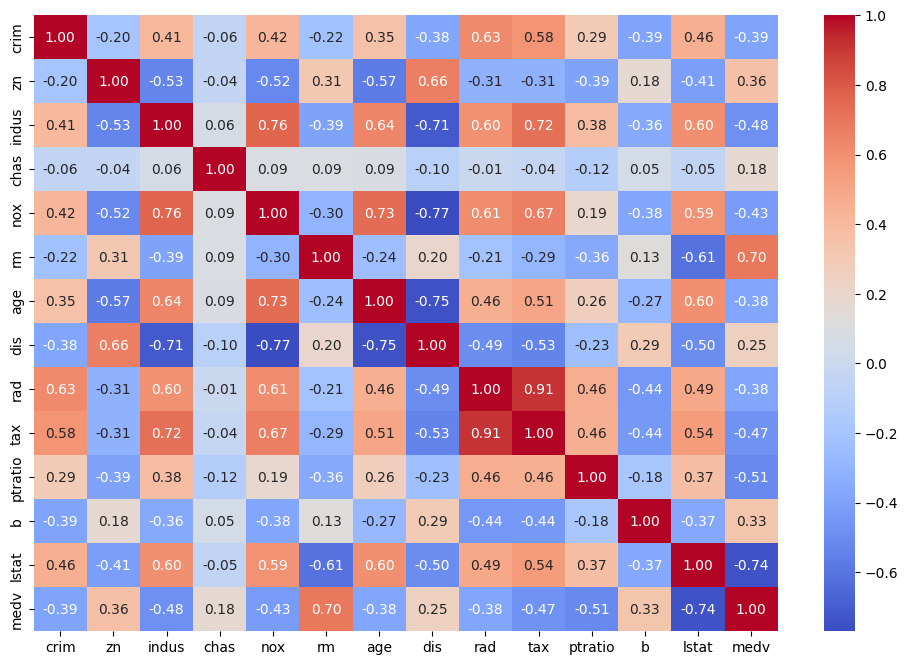

In [8]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm")

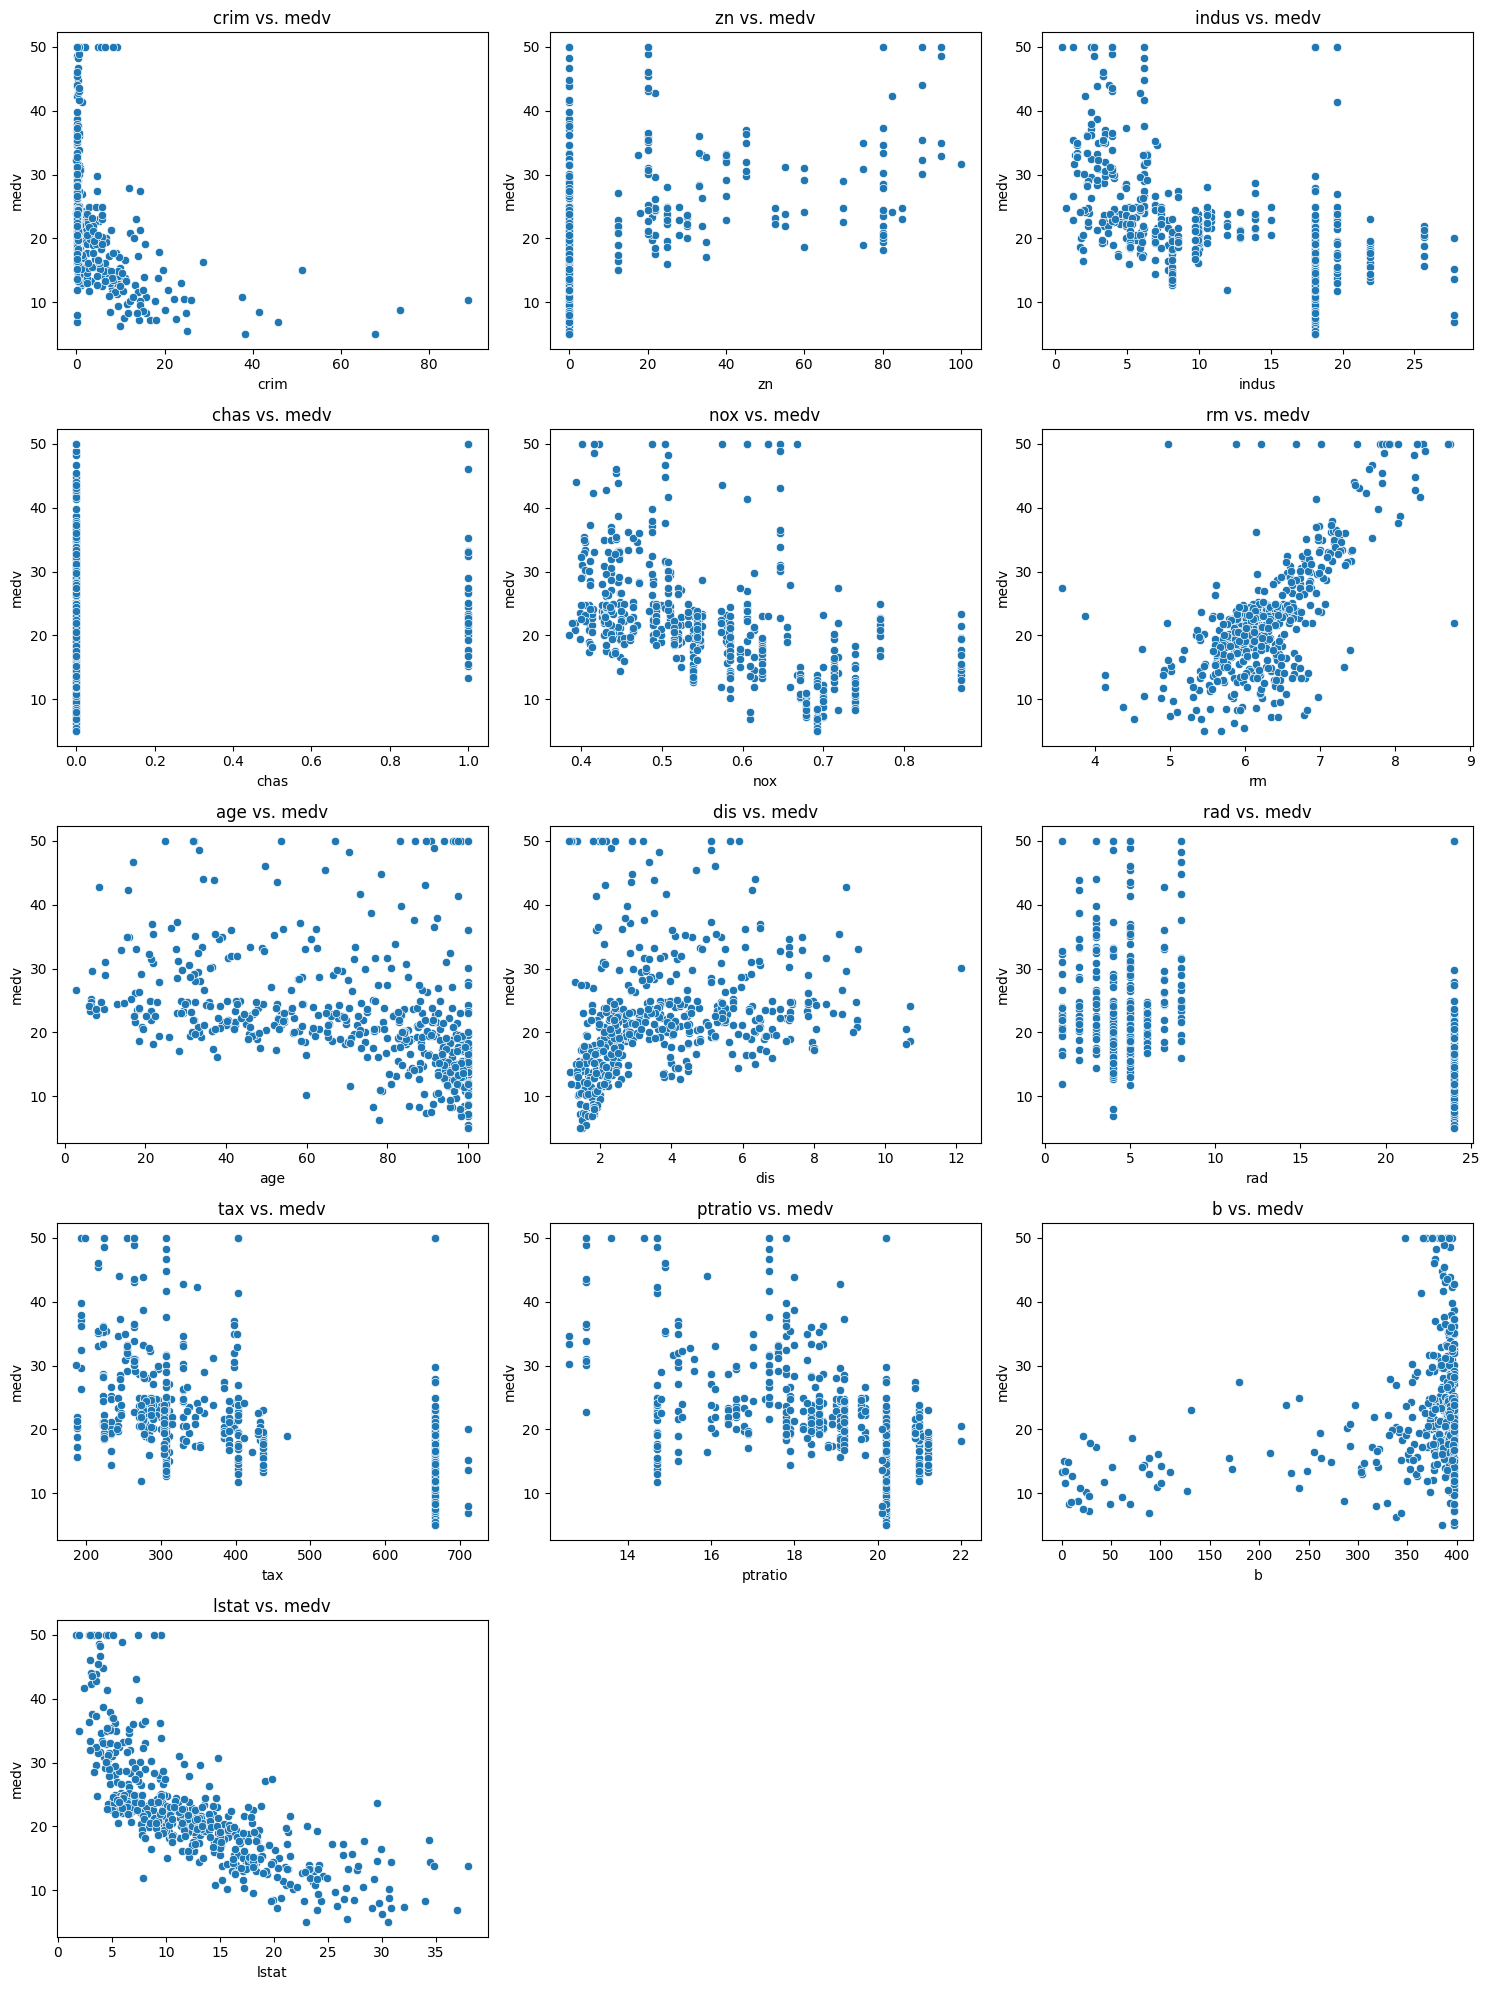

In [9]:

features = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)
    sns.scatterplot(data=df, x=feature, y='medv')
    plt.title(f'{feature} vs. medv')
    plt.xlabel(feature)
    plt.ylabel('medv')

plt.tight_layout()
plt.show()



In [10]:
x=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=29 )        # 2o% data for testing, 80% for training)

In [12]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
158,1.34284,0.0,19.58,0,0.605,6.066,100.0,1.7573,5,403,14.7,353.89,6.43
407,11.95110,0.0,18.10,0,0.659,5.608,100.0,1.2852,24,666,20.2,332.09,12.13
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
28,0.77299,0.0,8.14,0,0.538,6.495,94.4,4.4547,4,307,21.0,387.94,12.80
129,0.88125,0.0,21.89,0,0.624,5.637,94.7,1.9799,4,437,21.2,396.90,18.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.05372,0.0,13.92,0,0.437,6.549,51.0,5.9604,4,289,16.0,392.85,7.39
34,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307,21.0,248.31,20.34
236,0.52058,0.0,6.20,1,0.507,6.631,76.5,4.1480,8,307,17.4,388.45,9.54
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53


In [13]:
X_train.shape

(404, 13)

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
#training accuracy
model.score(X_train,y_train)

0.7288904934830602

In [16]:
#this is my bulk prediction
y_pred=model.predict(X_test)

In [17]:
y_test

185    29.6
225    50.0
64     33.0
19     18.2
128    18.0
       ... 
191    30.5
312    19.4
242    22.2
406    11.9
31     14.5
Name: medv, Length: 102, dtype: float64

In [18]:
y_pred

array([24.4826083 , 38.51001528, 23.07871509, 18.6118536 , 18.49258349,
       20.59672995, 28.48153741, 31.87661236, 18.05678722,  6.61872248,
       42.05759623, 27.37503546, 36.51887897, 14.00383052, 23.78400637,
       27.53551856, 23.83782631, 25.70807996, 19.63513834, 20.48602708,
       35.6613429 , 21.17884014, 19.29162275, 20.47089882, 32.60882906,
       21.42229289, 33.76315892, 24.93854571, 29.76041276, 33.9775146 ,
       32.99308388, 26.1861717 , 14.99104974, 25.81361053, 14.33263243,
        7.03384884, 23.29678272,  7.96818563, 14.49531636, 20.28758035,
       27.74672809, 23.24202323, 30.29495844, 14.10729305,  3.23804583,
       18.30049044, 16.4806311 , 39.11131204, 18.26497069, 18.95232278,
       28.20858018, 17.05073603, 23.64574469, 18.74706314, 20.02470009,
       11.56698867, 27.15460665, 22.44912293, 19.46224725, 20.3224397 ,
       29.94233933, 13.18499556, 25.47873003, 22.38043153, 20.82001329,
       16.66004875, 27.67802851, 34.12858224,  7.85006206, 22.71

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 16.963434063199614
R² Score: 0.7767656641842624


In [20]:
# Create DataFrame for one input
input_data = pd.DataFrame([{
    'crim': 0.1,
    'zn': 18.0,
    'indus': 2.3,
    'chas': 0,
    'nox': 0.45,
    'rm': 6.5,
    'age': 30.0,
    'dis': 5.0,
    'rad': 1,
    'tax': 296,
    'ptratio': 15.3,
    'b': 390.0,
    'lstat': 4.0
}])

# Predict using trained model
predicted_price = model.predict(input_data)

print(f"Predicted MEDV: ₹{predicted_price[0]:.2f}")

Predicted MEDV: ₹30.37


In [21]:
import joblib
#save moel to a file
joblib.dump(model,' Multiple Linear Regression model_github.joblib')

[' Multiple Linear Regression model_github.joblib']

In [22]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')